In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

In [4]:
train_data.isna().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64

In [5]:
# file_path 열 생성
train_data['file_path'] = train_data.apply(lambda row: f"archive/{row.patient_id}_{row.image_id}.png", axis=1)


In [6]:
train_data.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,file_path
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,archive/10006_462822612.png
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,archive/10006_1459541791.png
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,archive/10006_1864590858.png
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,archive/10006_1874946579.png
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,archive/10011_220375232.png


In [7]:
# Test 데이터 전처리
test_data['file_path'] = test_data.apply(lambda row: f"archive/{row['patient_id']}_{row['image_id']}.png", axis=1)

In [8]:
test_data['laterality']=test_data['laterality'].astype('string')
test_data['view']=test_data['view'].astype('category')

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   site_id        7 non-null      int64   
 1   patient_id     7 non-null      int64   
 2   image_id       7 non-null      int64   
 3   laterality     7 non-null      string  
 4   view           7 non-null      category
 5   age            7 non-null      int64   
 6   implant        7 non-null      int64   
 7   machine_id     7 non-null      int64   
 8   prediction_id  7 non-null      object  
 9   file_path      7 non-null      object  
dtypes: category(1), int64(6), object(2), string(1)
memory usage: 763.0+ bytes


In [9]:
test_data.head()

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id,file_path
0,2,10008,736471439,L,MLO,81,0,21,10008_L,archive/10008_736471439.png
1,2,10008,1591370361,L,CC,81,0,21,10008_L,archive/10008_1591370361.png
2,2,10008,68070693,R,MLO,81,0,21,10008_R,archive/10008_68070693.png
3,2,10008,361203119,R,CC,81,0,21,10008_R,archive/10008_361203119.png
4,1,16145,146978545,L,CC,86,0,49,1,archive/16145_146978545.png


In [10]:
train_data['laterality']=train_data['laterality'].astype('string')
train_data['view']=train_data['view'].astype('category')
train_data['file_path']=train_data['file_path'].astype('string')
train_data['cancer'] = train_data['cancer'].astype('int')
train_data = train_data.dropna(subset=['age'])



In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54669 entries, 0 to 54705
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   site_id                  54669 non-null  int64   
 1   patient_id               54669 non-null  int64   
 2   image_id                 54669 non-null  int64   
 3   laterality               54669 non-null  string  
 4   view                     54669 non-null  category
 5   age                      54669 non-null  float64 
 6   cancer                   54669 non-null  int64   
 7   biopsy                   54669 non-null  int64   
 8   invasive                 54669 non-null  int64   
 9   BIRADS                   26257 non-null  float64 
 10  implant                  54669 non-null  int64   
 11  density                  29433 non-null  object  
 12  machine_id               54669 non-null  int64   
 13  difficult_negative_case  54669 non-null  bool    
 14  file_p

In [12]:
train_data.isna().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                            0
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28412
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
file_path                      0
dtype: int64

In [13]:
def has_cancer(l):
    # Se le mete a la función la etiqueta, que puede ser [0] (no tiene cancer), [1] (tiene cancer), 
    # 0, 1] ó [1, 0] (tiene cancer en uno de los pechos)
    if len(l) == 1:
        if l[0] == 0:
            return False
        elif l[0] == 1:
            return True
        else:
            raise Exception
    elif len(l) == 2:
        return True
    else:
        raise Exception

patient_cancer_map = train_data.groupby('patient_id').cancer.unique().apply(lambda l: has_cancer(l))

In [14]:
def load_image(file_path):
    image = Image.open(file_path)
    image = image.convert('RGB')
    return image

def load_scans(file_paths, patient_id):
    slices = [load_image(file_path) for file_path in file_paths if os.path.isfile(file_path)]
    return slices

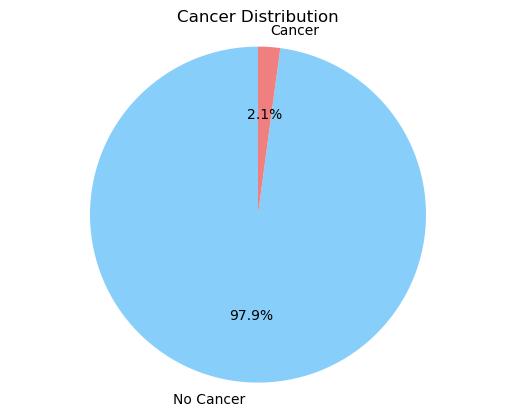

Cancer 0 count: 53511
Cancer 1 count: 1158


In [15]:
#암의 유무 수 카운트 

cancer_count = train_data['cancer'].value_counts()

# 그래프 그리기
labels = ['No Cancer', 'Cancer']
sizes = [cancer_count[0], cancer_count[1]]
colors = ['lightskyblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Cancer Distribution')
plt.show()

cancer_count = train_data['cancer'].value_counts()
zero_count = cancer_count[0]
one_count = cancer_count[1]

print("Cancer 0 count:", zero_count)
print("Cancer 1 count:", one_count)



<Axes: xlabel='cancer', ylabel='age'>

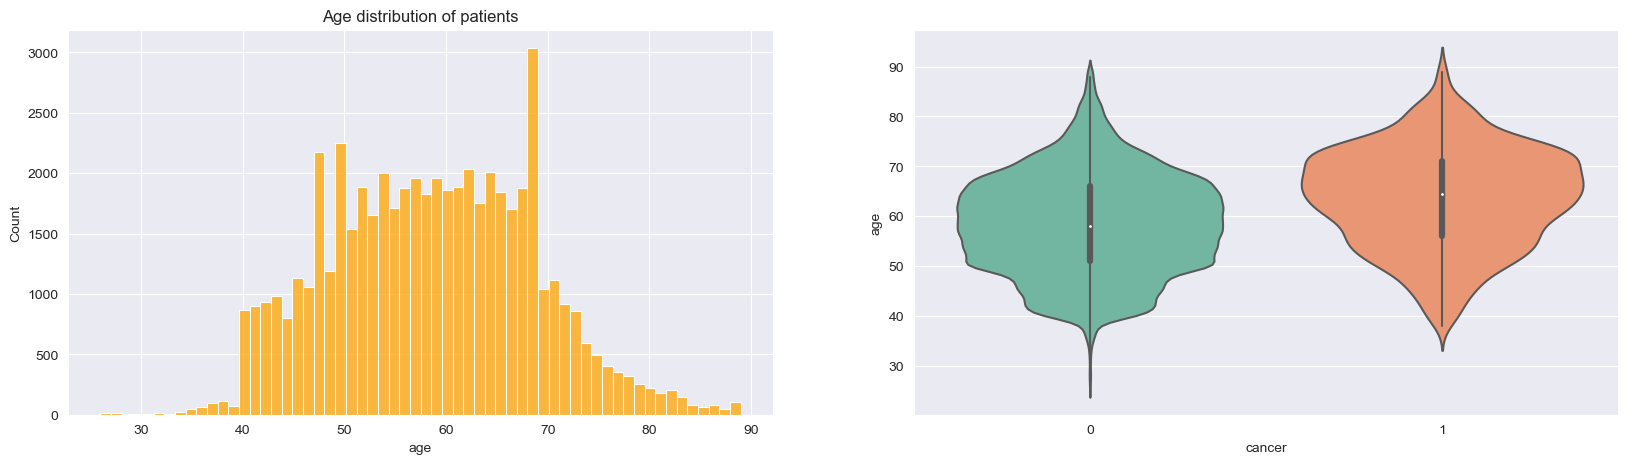

In [16]:
#나이 분포도와 나이별 암환자 분포도 조사 
sns.set_style('darkgrid')
sns.set_color_codes('bright')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

ages = train_data[train_data.age.isnull() == False].groupby(
    'patient_id').age.apply(lambda l: np.unique(l)[0])

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.histplot(train_data['age'], color='orange', bins=60, ax=ax[0])
ax[0].set_title('Age distribution of patients');
sns.violinplot(x=train_data['cancer'], y=train_data['age'], ax=ax[1], palette='Set2')


<Axes: xlabel='density', ylabel='count'>

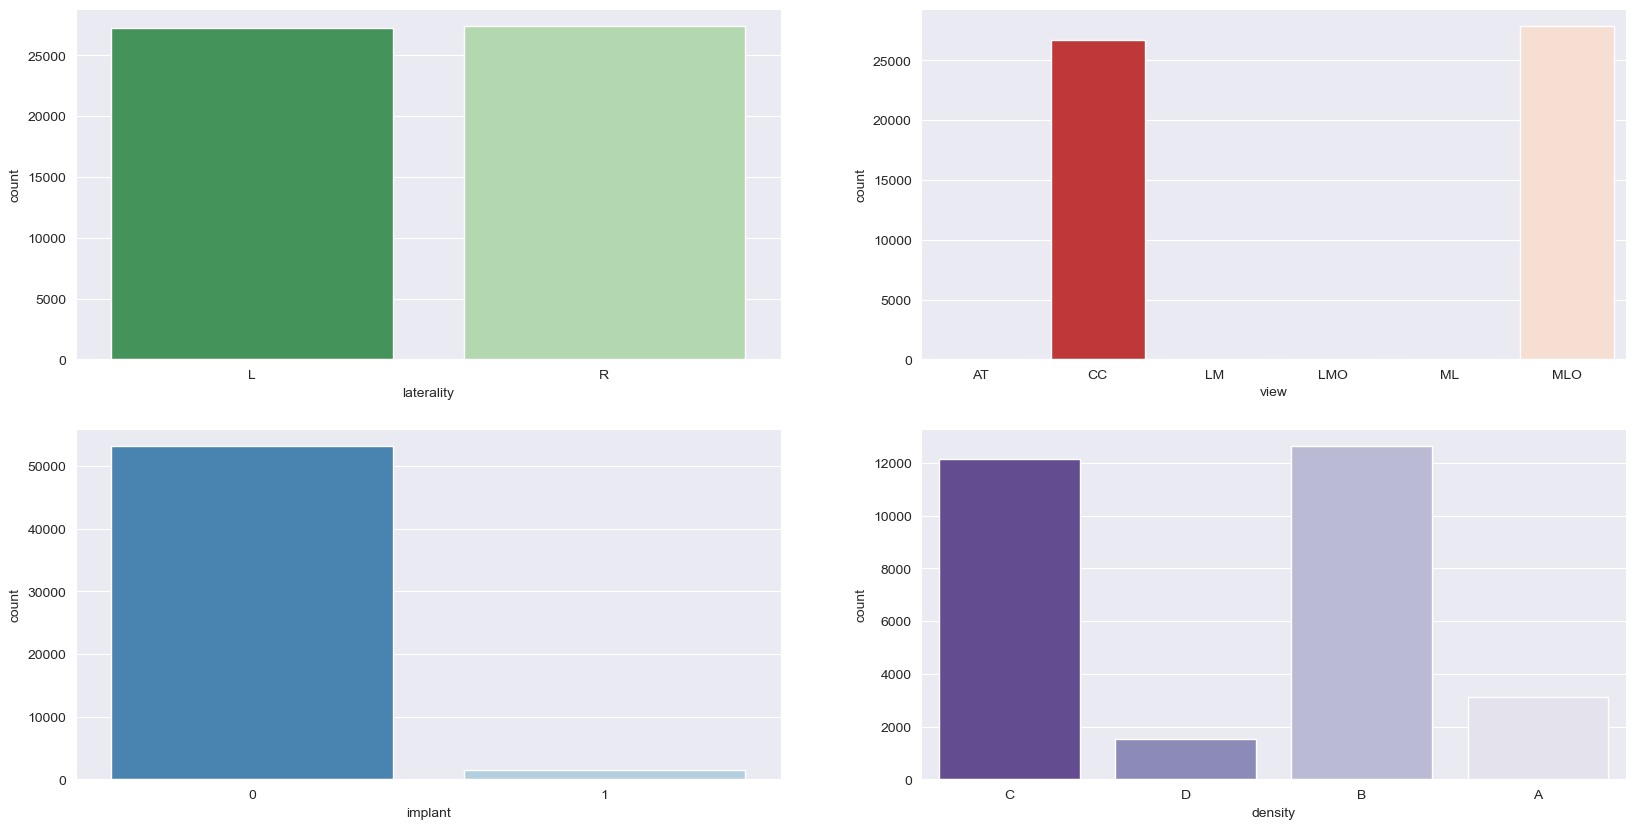

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(x=train_data['laterality'], ax=ax[0, 0], palette='Greens_r')
sns.countplot(x=train_data['view'], ax=ax[0, 1], palette='Reds_r')
sns.countplot(x=train_data['implant'], ax=ax[1, 0], palette='Blues_r')
sns.countplot(x=train_data['density'], ax=ax[1, 1], palette='Purples_r')


<Axes: xlabel='biopsy', ylabel='cancer'>

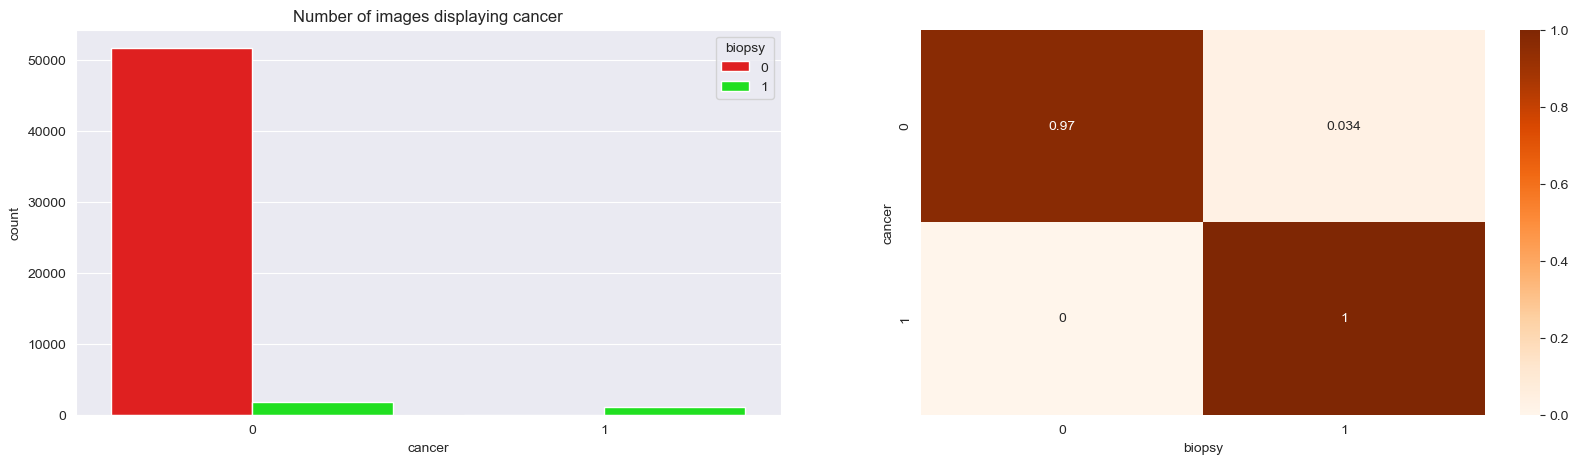

In [18]:
biopsy_counts = train_data.groupby('cancer').biopsy.value_counts().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x=train_data['cancer'], hue=train_data['biopsy'], palette=['#ff0000', '#00ff00'], ax=ax[0])
ax[0].set_title('Number of images displaying cancer')

biopsy_perc = biopsy_counts.transpose() / biopsy_counts.sum(axis=1)
sns.heatmap(biopsy_perc.transpose(), ax=ax[1], annot=True, cmap='Oranges')



In [19]:
train_data.cancer.value_counts()/train_data.shape[0]

0    0.978818
1    0.021182
Name: cancer, dtype: float64

In [20]:
patient_cancer_map.value_counts() / patient_cancer_map.shape[0]

False    0.959177
True     0.040823
Name: cancer, dtype: float64

<Axes: xlabel='BIRADS', ylabel='count'>

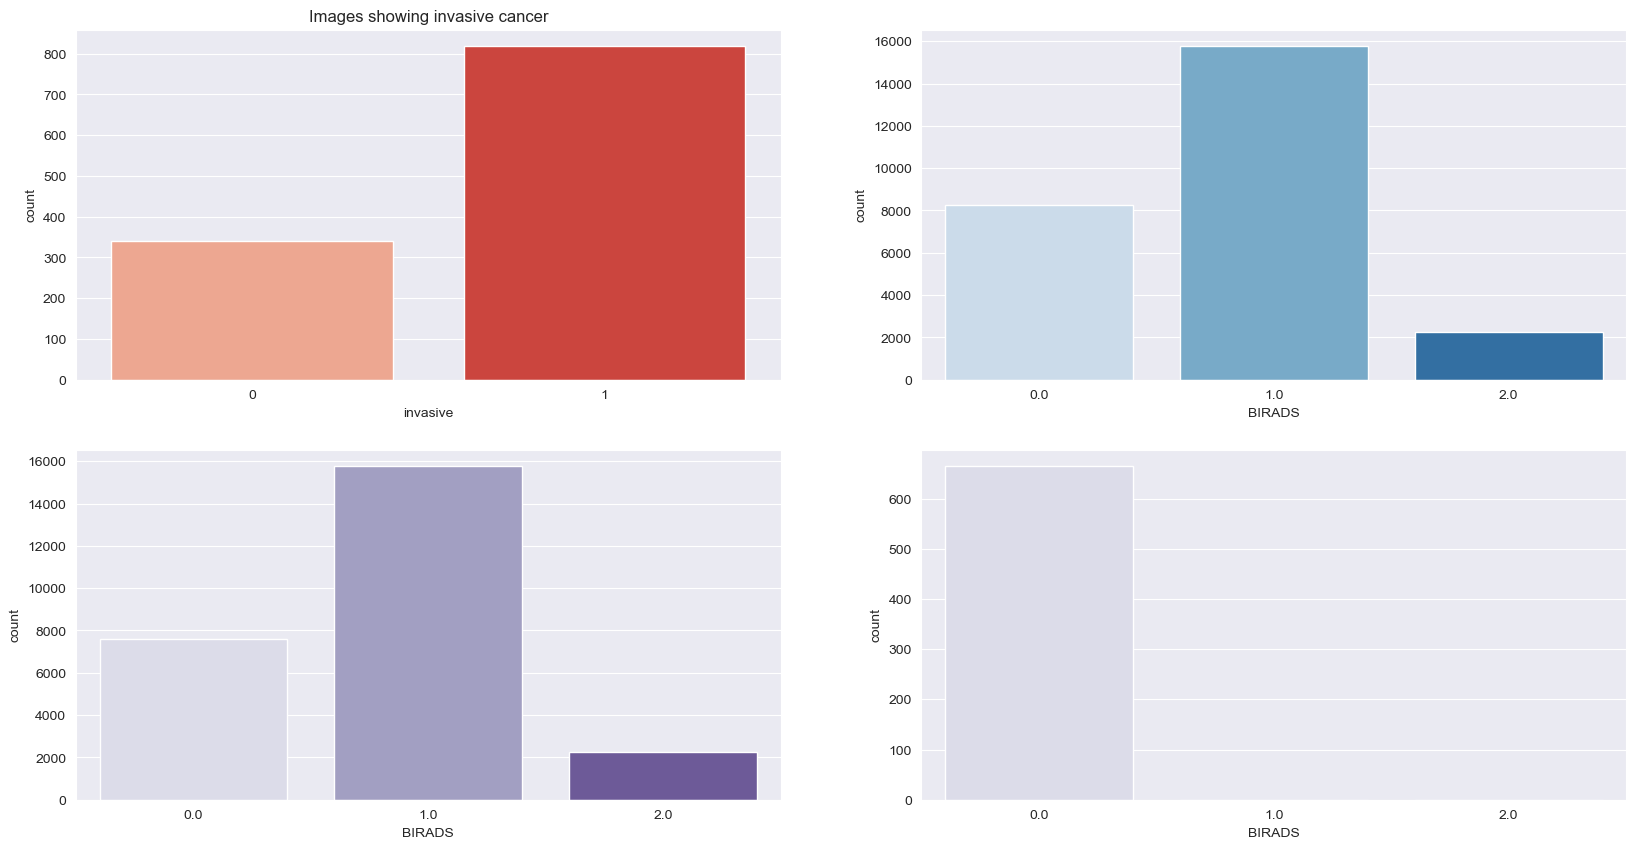

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(x=train_data[train_data.cancer==1]['invasive'], ax=ax[0, 0], palette='Reds')
sns.countplot(x=train_data['BIRADS'], order=[0., 1., 2.], ax=ax[0, 1], palette='Blues')
ax[0, 0].set_title('Images showing invasive cancer')

sns.countplot(x=train_data[train_data.cancer==0]['BIRADS'], order=[0., 1., 2.], ax=ax[1, 0], palette='Purples')
sns.countplot(x=train_data[train_data.cancer==1]['BIRADS'], order=[0., 1., 2.], ax=ax[1, 1], palette='Purples')


In [22]:
# 첫 번째 이미지 파일의 경로
sample_path = train_data['file_path'][0]

# 이미지 로드
sample_image = load_image(sample_path)

# 이미지 시각화
plt.imshow(sample_image)
plt.show()


NameError: name 'Image' is not defined

In [23]:
patient_ids = train_data.patient_id.unique()

In [24]:
scans = train_data['file_path']

In [25]:

image = load_image(scans[0])
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(np.ravel(image), ax=ax[0])
ax[1].imshow(image)


NameError: name 'Image' is not defined

In [26]:
cols = ['image_id','age','machine_id','file_path']
for i in list(train_data.drop(cols,axis=1).columns):
    print(i)
    print(train_data[i].value_counts())
    print('----------------\n')

site_id
1    29482
2    25187
Name: site_id, dtype: int64
----------------

patient_id
55706    14
52868    14
5421     13
51115    13
26530    13
         ..
32751     4
32763     4
32770     4
32779     4
9989      4
Name: patient_id, Length: 11905, dtype: int64
----------------

laterality
R    27422
L    27247
Name: laterality, dtype: Int64
----------------

view
MLO    27883
CC     26748
AT        19
LM        10
ML         8
LMO        1
Name: view, dtype: int64
----------------

cancer
0    53511
1     1158
Name: cancer, dtype: int64
----------------

biopsy
0    51700
1     2969
Name: biopsy, dtype: int64
----------------

invasive
0    53851
1      818
Name: invasive, dtype: int64
----------------

BIRADS
1.0    15755
0.0     8242
2.0     2260
Name: BIRADS, dtype: int64
----------------

implant
0    53192
1     1477
Name: implant, dtype: int64
----------------

density
B    12642
C    12155
A     3105
D     1531
Name: density, dtype: int64
----------------

difficult_negative

In [27]:
# cancer cases
# cancer
# 0    53548
# 1     1158
# Name: cancer, dtype: int64
# ----------------

df = train_data.copy()
# imgs of cancer
canc_count = df.loc[df['cancer']==1].shape[0]
canc_count

# pick as many non canc cases as canc cases
df2 = df.loc[df['cancer']==0][:canc_count]

# use rest of imgs for testing model
df_test_1 = df.loc[df['cancer']==0][canc_count:]

# see how is the split
df2['cancer'].value_counts()

# cancat both categ cases
df3 = df.loc[df['cancer']==1]
df4 = pd.concat([df2,df3],axis=0)
# look at the split
df4['cancer'].value_counts()

# df4 = The balanced data set

0    1158
1    1158
Name: cancer, dtype: int64

In [28]:
# make split - train&val : 90% , test : 10%

perc_90 = int(1158*0.9)

noncanc_df = df4.loc[df4['cancer']==0]
# take 90% non canc cases
noncanc_df_train = noncanc_df[:perc_90]
# take 10% non canc cases
noncanc_df_test = noncanc_df[perc_90:]

canc_df = df4.loc[df4['cancer']==1]
# take 90% canc cases
canc_df_train = canc_df[:perc_90]
# take 10% canc cases
canc_df_test = canc_df[perc_90:]

train_df_new = pd.concat([noncanc_df_train,canc_df_train],axis = 0)
test_df_new = pd.concat([noncanc_df_test,canc_df_test],axis = 0)

train_df_new['cancer'].value_counts()
test_df_new['cancer'].value_counts()

0    116
1    116
Name: cancer, dtype: int64

In [29]:
Y_train = list(train_df_new.drop(['file_path'], axis=1).columns)
Y_val = list(test_df_new.drop(['file_path'], axis=1).columns)
# Y_test = list(test_df.drop(['img_path'], axis=1).columns)
# unq_disease = len(Y_val)
# unq_disease
Y_train


['site_id',
 'patient_id',
 'image_id',
 'laterality',
 'view',
 'age',
 'cancer',
 'biopsy',
 'invasive',
 'BIRADS',
 'implant',
 'density',
 'machine_id',
 'difficult_negative_case']

In [30]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                rotation_range=90,
                                                               validation_split=0.20)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# The value for class_mode in flow_from_dataframe MUST be 'raw' if you are attempting to do multilabel classification.
train_gen = train_datagen.flow_from_dataframe(train_df_new, 
                                              x_col='file_path', 
                                              y_col=['cancer'],
                                              target_size=(128,128),
                                              class_mode='raw',
                                              batch_size=16,
                                              shuffle=True)


Found 2084 validated image filenames.


In [31]:
val_gen = train_datagen.flow_from_dataframe(test_df_new,
                                          x_col='file_path',
                                          y_col=['cancer'],
                                          target_size=(128,128),
                                          class_mode='raw',
                                          batch_size=8)

Found 232 validated image filenames.


In [32]:
test_gen = train_datagen.flow_from_dataframe(test_df_new,
                                            x_col='file_path',
                                            y_col='cancer',
                                          target_size=(128,128),
                                          class_mode='raw',
                                          batch_size=8,
                                         seed = 42)

Found 232 validated image filenames.


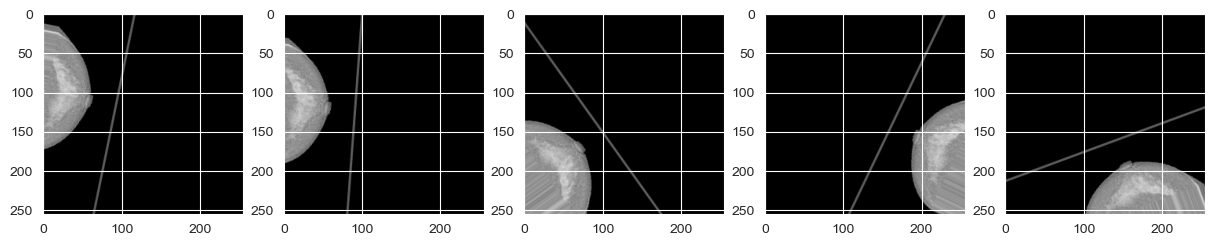

In [33]:
# Load some sample images
img_path = 'archive/10006_462822612.png'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(256, 256))

# Convert image to numpy array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Add a batch dimension to the array
img_array = np.expand_dims(img_array, axis=0)

# Generate augmented images using the flow() method
aug_iter = train_datagen.flow(img_array, batch_size=1)

# Visualize the augmented images
fig, ax = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    aug_img = next(aug_iter)[0]
    ax[i].imshow(aug_img)
plt.show()

In [34]:
def UNet(inputs):
    # First convolution block
    x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    d1_con = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(x)
    d1 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(d1_con)
    
    # Second convolution block
    d2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d1)
    d2_con = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d2)
    d2 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(d2_con)
    
    # Third convolution block
    d3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d2)
    d3_con = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d3)
    d3 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(d3_con)
    
    # Fourth convolution block
    d4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d3)
    d4_con = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d4)
    d4 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(d4_con)
    
    # Bottleneck layer
    b = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d4)
    b = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(b)
    
    # First upsampling block
    u1 = tf.keras.layers.Conv2DTranspose(512, 3, strides =(2,2),padding='same')(b)
    u1 = tf.keras.layers.Concatenate(axis=3)([u1, d4_con])
    u1 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u1)
    u1 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u1)
    
    # Second upsampling block
    u2 = tf.keras.layers.Conv2DTranspose(256, 3, strides =(2,2),padding='same')(u1)
    u2 = tf.keras.layers.Concatenate(axis=3)([u2, d3_con])
    u2 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u2)
    u2 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u2)
    
    
    
    # Third upsampling block
    u3 = tf.keras.layers.Conv2DTranspose(128, 3, strides =(2,2),padding='same')(u2)
    u3 = tf.keras.layers.Concatenate(axis=3)([u3, d2_con])
    u3 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u3)
    u3 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u3)
    
    # Fourth upsampling block
    u4 = tf.keras.layers.Conv2DTranspose(64, 3, strides =(2,2),padding='same')(u3)
    u4 = tf.keras.layers.Concatenate(axis=3)([u4, d1_con])
    u4 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u4)
    u4 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u4)
    
    
    
    # Flatten and output
    flat = tf.keras.layers.Flatten()(u4)
    hid1 = tf.keras.layers.Dense(units=50, activation='relu')(flat)
    # Instead of flattening and using dense layers
    # Use a global average pooling layer
    gap = tf.keras.layers.GlobalAveragePooling2D()(u4)
    out = tf.keras.layers.Dense(1, activation='sigmoid')(gap)

    model = tf.keras.Model(inputs=[inputs], outputs=[out])
    return model

In [35]:
from keras.metrics import Accuracy

auc = tf.keras.metrics.AUC(multi_label=True,thresholds=[0,0.5])
aucpr = tf.keras.metrics.AUC(curve='PR',multi_label=True,thresholds=[0,0.5])
inputs = tf.keras.layers.Input(shape=(128,128,3))
unet = UNet(inputs)
unet.compile(optimizer='adam', loss='binary_crossentropy', metrics=[auc,aucpr]) #,tf.keras.metrics.Accuracy()
unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

Total params: 34513345 (131.66 MB)
Trainable params: 34513345 (131.66 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [36]:
model_history = unet.fit(train_gen, epochs=5, validation_data=val_gen)



Epoch 1/5
131/131 [==============================] - 739s 6s/step - loss: 0.7016 - auc: 0.5005 - auc_1: 0.5004 - val_loss: 0.6938 - val_auc: 0.5000 - val_auc_1: 0.5000
Epoch 2/5
131/131 [==============================] - 826s 6s/step - loss: 0.6918 - auc: 0.5134 - auc_1: 0.5106 - val_loss: 0.6975 - val_auc: 0.5000 - val_auc_1: 0.5000
Epoch 3/5
131/131 [==============================] - 898s 7s/step - loss: 0.6905 - auc: 0.5254 - auc_1: 0.5175 - val_loss: 0.6966 - val_auc: 0.4397 - val_auc_1: 0.4619
Epoch 4/5
131/131 [==============================] - 1039s 8s/step - loss: 0.6927 - auc: 0.5259 - auc_1: 0.5160 - val_loss: 0.6933 - val_auc: 0.5172 - val_auc_1: 0.5097
Epoch 5/5
131/131 [==============================] - 993s 8s/step - loss: 0.9662 - auc: 0.5202 - auc_1: 0.5115 - val_loss: 0.6932 - val_auc: 0.5000 - val_auc_1: 0.5000


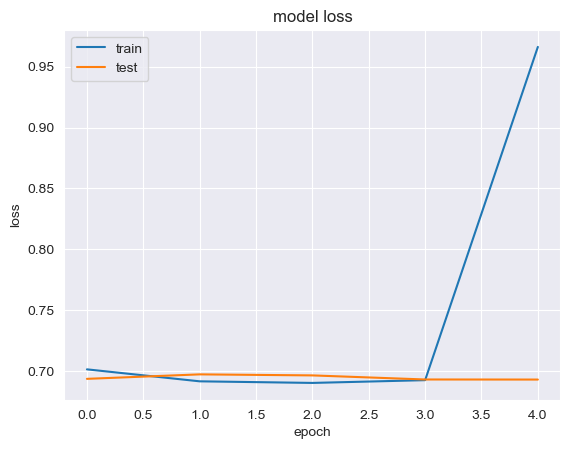

In [37]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')


plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
# Evaluate model on test data
evaluation_metrics = unet.evaluate(val_gen)

evaluation_metrics

# for train_gen : loss: 0.6638 - accuracy: 0.6247 - auc_10: 0.5000 - auc_11: 0.6247
# for val_gen : loss: 1.1809 - accuracy: 0.0000e+00 - auc_10: 0.0000e+00 - auc_11: 0.0000e+00
# for test_gen : loss: 0.7860 - accuracy: 0.5000 - auc_10: 0.5000 - auc_11: 0.5000

29/29 [==============================] - 19s 648ms/step - loss: 0.6932 - auc: 0.5000 - auc_1: 0.5000


[0.6932135224342346, 0.5, 0.5]

In [196]:
# Evaluate model on test data
evaluation_metrics = unet.evaluate(val_gen)

evaluation_metrics

29/29 [==============================] - 17s 594ms/step - loss: 0.6932 - auc: 0.5000 - auc_1: 0.5000


[0.6931503415107727, 0.5, 0.5]

In [204]:
df_temp1 = df4.loc[df4['cancer']==0]
non_canc_path = df_temp1['file_path'].iloc[0]
non_canc_path

'archive/10006_462822612.png'